In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
(trainx,trainy),(testx,testy) = keras.datasets.mnist.load_data()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
trainx=trainx/255.0
testx=testx/255.0

In [3]:
import pickle
traincircley=pickle.load(open('drive/MyDrive/circledatatrain.pkl', 'rb'))


In [4]:
for i in range(len(traincircley)):
    traincircley[i][10]=traincircley[i][10]/28
    traincircley[i][11]=traincircley[i][11]/28
    traincircley[i][12]=traincircley[i][12]/14

In [5]:
import pickle
testcircley=pickle.load(open('drive/MyDrive/circledatatest.pkl', 'rb'))


In [6]:
for i in range(len(testcircley)):
    testcircley[i][10]=testcircley[i][10]/28
    testcircley[i][11]=testcircley[i][11]/28
    testcircley[i][12]=testcircley[i][12]/14

In [7]:
trainx.shape

(60000, 28, 28)

In [361]:
import tensorflow.keras.layers as KL
import tensorflow.keras.models as KM
input=KL.Input(shape=(28,28,1))
conv1=KL.Conv2D(16,(5,5),padding="same",activation="relu")(input)
conv1=KL.Conv2D(16,(5,5),padding="valid",activation="relu")(conv1)

conv1=KL.Conv2D(16,(5,5),padding="same",activation="relu")(conv1)

avg1=KL.MaxPooling2D(2)(conv1)
conv2=KL.Conv2D(32,(5,5),padding="valid",activation="relu")(avg1)
conv2=KL.Conv2D(32,(5,5),padding="same",activation="relu")(conv2)
flat=KL.Flatten()(conv2)
out1=KL.Dense(1024,activation="relu")(flat)
out2=KL.Dense(512,activation="relu")(out1)
out3=KL.Dense(256,activation="relu")(out2)
out4=KL.Dense(128,activation="relu")(out3)
out5=KL.Dense(64,activation="relu")(out4)
out6=KL.Dense(32,activation="relu")(out5)
out7=KL.Dense(16,activation="relu")(out6)
output=KL.Dense(13,activation="sigmoid")(out7)
lenet=KM.Model(input,output)
lenet.summary()

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 24, 24, 16)        6416      
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 24, 16)        6416      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 8, 8, 32)          12832     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 8, 32)          256

In [363]:
def customloss1(y_true,y_pred):
    print((y_true.shape))
    loss=keras.losses.categorical_crossentropy(y_true[0:32,0:10],y_pred[0:32,0:10])+keras.losses.MSE(y_true[0:32,10:],y_pred[0:32,10:])
    print(y_pred)

    return loss
lenet.compile(optimizer='adam', loss=customloss1)

In [364]:
trainx=np.array(trainx)
traincircley=np.array(traincircley)
traincircley=traincircley.astype(np.float32)
trainx=trainx.astype(np.float32)

In [365]:
lenet.fit(trainx,traincircley,batch_size=32,epochs=7)

Epoch 1/7
(32, 13)
Tensor("model_13/dense_105/Sigmoid:0", shape=(32, 13), dtype=float32)
(32, 13)
Tensor("model_13/dense_105/Sigmoid:0", shape=(32, 13), dtype=float32)
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7206
Epoch 2/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0884
Epoch 3/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0605
Epoch 4/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0504
Epoch 5/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0466
Epoch 6/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0383
Epoch 7/7
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0382


In [366]:
testcircley=np.array(testcircley)
testcircley=testcircley.astype(np.float32)
lossontest=lenet.evaluate(testx,testcircley)

(None, 13)
Tensor("model_13/dense_105/Sigmoid:0", shape=(None, 13), dtype=float32)
313/313 [==============================] - 1s 2ms/step - loss: 0.0412


In [375]:
lossontest

0.04116813465952873

In [376]:
testcircley[2]

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.4642857 , 0.5       , 0.78571427], dtype=float32)

In [377]:
predictions=lenet.predict(testx)

In [378]:
testx[0].shape

(28, 28)

In [379]:
predictions[2]

array([1.54216503e-19, 9.99999762e-01, 3.15201365e-10, 1.62416455e-10,
       1.20228588e-12, 6.07182500e-08, 1.96272082e-15, 1.43954386e-08,
       1.09232345e-10, 4.06005042e-15, 4.82406616e-01, 4.77414489e-01,
       7.44811893e-01], dtype=float32)

In [380]:
def predictionexplained(pred):
    max=0
    maxind=-1
    i=0
    for i in range(10):
        if pred[i]>max:
            max=pred[i]
            maxind=i
    x=int(round(pred[10]*28))
    y=int(round(pred[11]*28))
    radius=int(round(pred[12]*14))
    return maxind,x,y,radius

In [381]:
p=predictionexplained(predictions[2])

In [382]:
len(predictions[2])

13

In [383]:
import cv2 as cv

In [384]:
p

(1, 14, 13, 10)

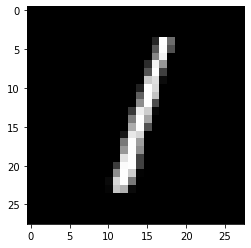

In [385]:
plt.imshow(testx[2],cmap='gray')

In [386]:
def circledrawing(im,radius,x,y):
    colorim=np.zeros((28,28,3))
    for i in range(28):
      for j in range(28):
        if im[i][j]>0:
          colorim[i][j][0]=im[i][j]
          colorim[i][j][1]=im[i][j]
          colorim[i][j][2]=im[i][j]
    imge=cv.circle(colorim,(x,y),radius,(255,0,0),1)
    return imge


In [387]:
def circlemaker(im):
    points=[]
    for i in range(28):
        for j in range(28):
            if im[i][j]==1:
                points.append([i,j])
    points=np.array(points)
    points=points.astype(np.int)
    (x,y),radius = cv.minEnclosingCircle(points)
    return int(x),int(y),int(radius)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


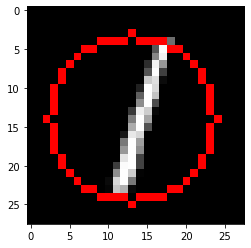

In [388]:
plt.imshow(circledrawing(testx[2],int(round(testcircley[2][12]*14)),int(round(testcircley[2][10]*28)),int(round(testcircley[2][11]*28))))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


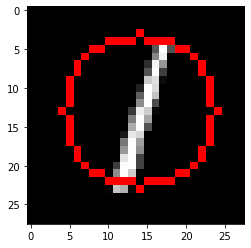

In [389]:
plt.imshow(circledrawing(testx[2],p[3],p[1],p[2]))

In [390]:
import math
def jaccardfinder(r1,x1,y1,r2,x2,y2):
    circ1=0
    circ2=0
    intersections=0
    for i in range(28):
        for j in range(28):
            d1=((i-x1)**2)+((j-y1)**2)
            d1=math.sqrt(d1)
            d2=((i-x2)**2)+((j-y2)**2)
            d2=math.sqrt(d2)
            if d1<=(r1):
                circ1=circ1+1
            if d2<=(r2):
                circ2=circ2+1
            if d1<=(r1) and d2<=(r2):
                intersections=intersections+1
    return (intersections)/(circ1+circ2-intersections)
            

In [391]:
jaccardfinder(p[3],p[1],p[2],int(testcircley[2][12]*14),int(testcircley[2][10]*28),int(testcircley[2][11]*28))

0.7513812154696132

In [392]:
avgjaccardscore=0
for i in range(10000):
    p=predictionexplained(predictions[i])
    q=predictionexplained(testcircley[i])
    if p[0]==q[0]:
        jacc=jaccardfinder(p[3],p[1],p[2],q[3],q[1],q[2])
        avgjaccardscore=avgjaccardscore+jacc

In [393]:
avgjaccardscore=avgjaccardscore/10000

In [394]:
print("The average jaccard score is ",avgjaccardscore)

The average jaccard score is  0.8261841803795902


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


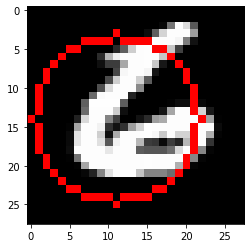

In [395]:
plt.imshow(circledrawing(testx[9999],p[3],p[1],p[2]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


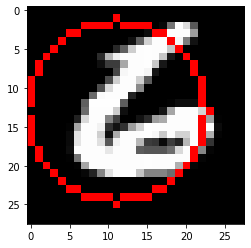

In [396]:
plt.imshow(circledrawing(testx[9999],q[3],q[1],q[2]))

In [360]:
q[0]

6